<a href="https://colab.research.google.com/github/Sreelakshmim6/Personal-Projects/blob/main/Rossmann_Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description:
We are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## Files
train.csv - historical data including Sales,
test.csv - historical data excluding Sales,
sample_submission.csv - a sample submission file in the correct format,
store.csv - supplemental information about the stores.

## Problem Statement:
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. We need to predict sales based on their unique circumstances.

## Data fields:

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import math
import seaborn as sns
import matplotlib.pyplot as plt
#for removing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading files
train=pd.read_csv("C:\\Users\\Siri\\Desktop\\ANN\\rossmann-store-sales\\train.csv")
print(train.shape)
train.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [ ]:
test=pd.read_csv("C:\\Users\\Siri\\Desktop\\ANN\\rossmann-store-sales\\test.csv")
print(test.shape)
test.head()

(41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
store_df=pd.read_csv("C:\\Users\\Siri\\Desktop\\ANN\\rossmann-store-sales\\store.csv")
print(store_df.shape)
store_df.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Checking for null values

In [ ]:
train.info() # no null values in train data
print("----------------------------------------------")
test.info() #few null values in open

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfW

#### Train Data Analysis

In [ ]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Adding new variable
#train['Sales_per_customer']=train['Sales']/train['Customers']
#train['Sales_per_customer'].describe() # An average of 9.49$ is earned from a customer at a particular store

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: Sales_per_customer, dtype: float64

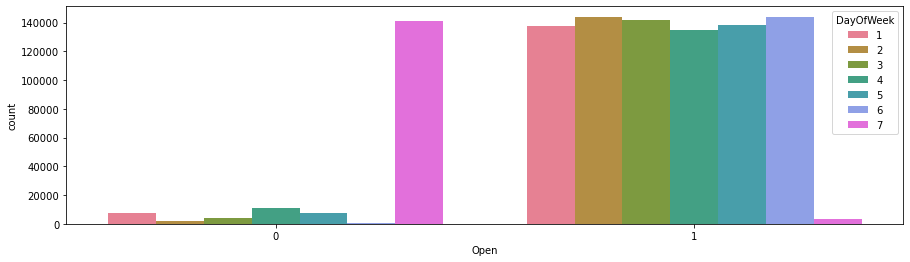

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train,palette="husl", ax=ax1)

Many stores are closed on Sundays 

In [ ]:
# Date

# Create Year and Month columns
train['Year']  = train['Date'].apply(lambda x: int(str(x)[:4]))
train['Month'] = train['Date'].apply(lambda x: int(str(x)[5:7]))

test['Year']  = test['Date'].apply(lambda x: int(str(x)[:4]))
test['Month'] = test['Date'].apply(lambda x: int(str(x)[5:7]))

# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
train['Date'] = train['Date'].apply(lambda x: (str(x)[:7]))
test['Date']     = test['Date'].apply(lambda x: (str(x)[:7]))

# group by date and get average sales, and percent change
avg_sales    = train.groupby('Date')["Sales"].mean()
pct_change_sales = train.groupby('Date')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = avg_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(avg_sales)))
ax1.set_xticklabels(avg_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")

ValueError: invalid literal for int() with base 10: '31-0'

We can see that sales during december are at peak

ValueError: Could not interpret input 'Year'

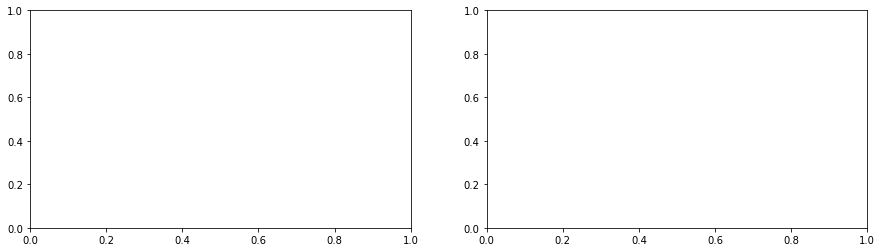

In [ ]:
# Plot average sales and customers over years
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Year', y='Sales', data=train, ax=axis1)
sns.barplot(x='Year', y='Customers', data=train, ax=axis2)

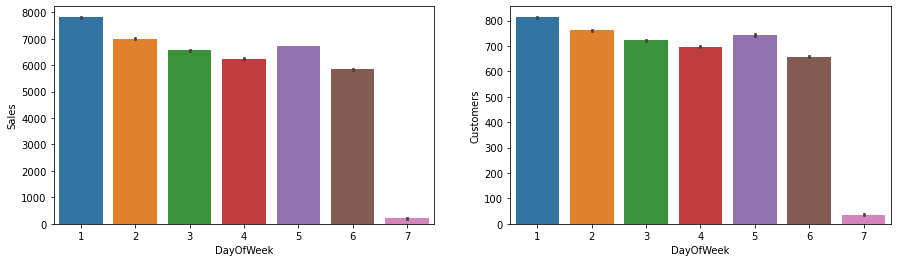

In [ ]:
# Plot average sales and customers over days of week
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=train, ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=train, ax=axis2) 

Sales and Customers on Sunday are lowest as many stores are closed 

<AxesSubplot:xlabel='Month', ylabel='Customers'>

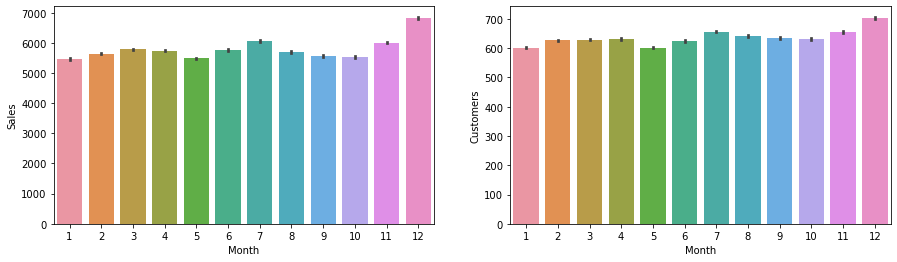

In [ ]:
# Plot average sales and customers over months
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Month', y='Sales', data=train, ax=axis1)
sns.barplot(x='Month', y='Customers', data=train, ax=axis2)

Sales and Customers are comparatively higher in December as compared to other months

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

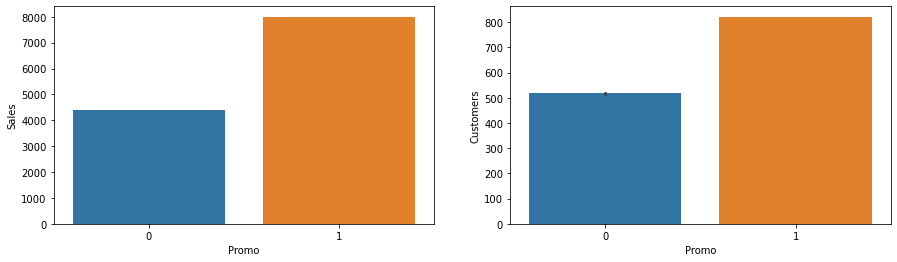

In [ ]:
# Plot average sales and customers with/without promo
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=train, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=train, ax=axis2)

We can clearly see without promo the store doesn't stand a chance against stores with promo

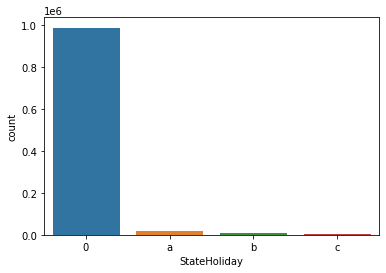

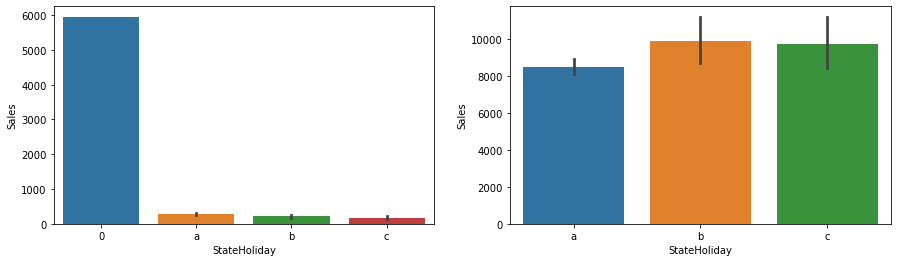

In [ ]:
# StateHoliday has values 0 & "0", So, we need to merge values with 0 to "0"
train["StateHoliday"]= train["StateHoliday"].replace(0, "0")

sns.countplot(x='StateHoliday',data=train)

# Plot average sales on StateHoliday
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data=train, ax=axis1)
filt = (train["StateHoliday"] != "0") & (train["Sales"] > 0) # we are taking sales which are more than 0
sns.barplot(x='StateHoliday', y='Sales', data=train[filt], ax=axis2)
plt.show()

Text(0.5, 1.0, 'Average Sales of stores which are open')

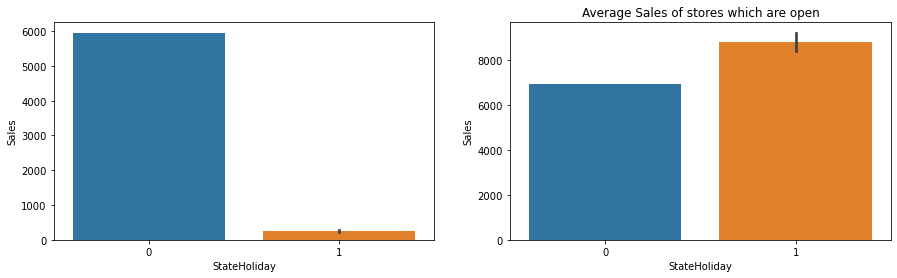

In [ ]:
# Combining a,b and c type stores so as to reduce the bias
train["StateHoliday"] = train["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
test["StateHoliday"] = test["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.title('All Sales of stores')
sns.barplot(x='StateHoliday', y='Sales', data=train, ax=axis1)
filt = (train["Sales"] > 0) # we are taking sales which are more than 0
sns.barplot(x='StateHoliday', y='Sales', data=train[filt], ax=axis2)
plt.title('Average Sales of stores which are open')

From the above graphs we can clearly see that the stores which are 'OPEN' during stateholidays have high sales

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Customers'>

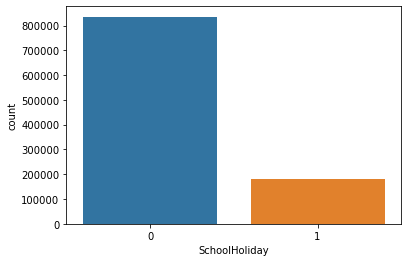

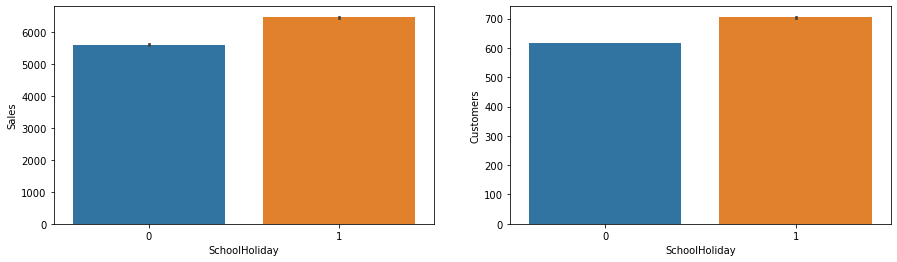

In [ ]:
# Visualizing Sales over SchoolHoliday
sns.countplot(x='SchoolHoliday',data=train)

# Plot average sales on StateHoliday
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=train, ax=axis1)

sns.barplot(x='SchoolHoliday', y='Customers', data=train, ax=axis2)

We can clearly see that the sales & customers during School Holiday are more compared to normal days

<AxesSubplot:ylabel='Frequency'>

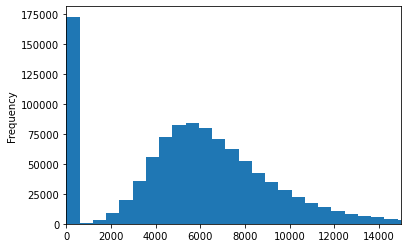

In [ ]:
train["Sales"].plot(kind='hist',bins=70,xlim=(0,15000))

There are mostly 0's in this plot because the stores were closed

STORE DATA

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.info() # many null values
print("----------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
----------------------------------------------


In [ ]:
store_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

#### Train and Store data Preprocessing

In [ ]:
# Merging train and store_df
train_store = pd.merge(right=store_df,left=train,how='outer',on='Store')
print(train_store.shape)
train_store.head()

(1017209, 21)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_per_customer,...,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07,5263,555,1,1,0,1,9.482883,...,7,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07,5020,546,1,1,0,1,9.194139,...,7,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07,4782,523,1,1,0,1,9.143403,...,7,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07,5011,560,1,1,0,1,8.948214,...,7,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07,6102,612,1,1,0,1,9.970588,...,7,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   Sales_per_customer         844340 non-null   float64
 10  Year                       1017209 non-null  int64  
 11  Month                      1017209 non-null  int64  
 12  StoreType                  1017209 non-null  object 
 13  Assortment  

<AxesSubplot:>

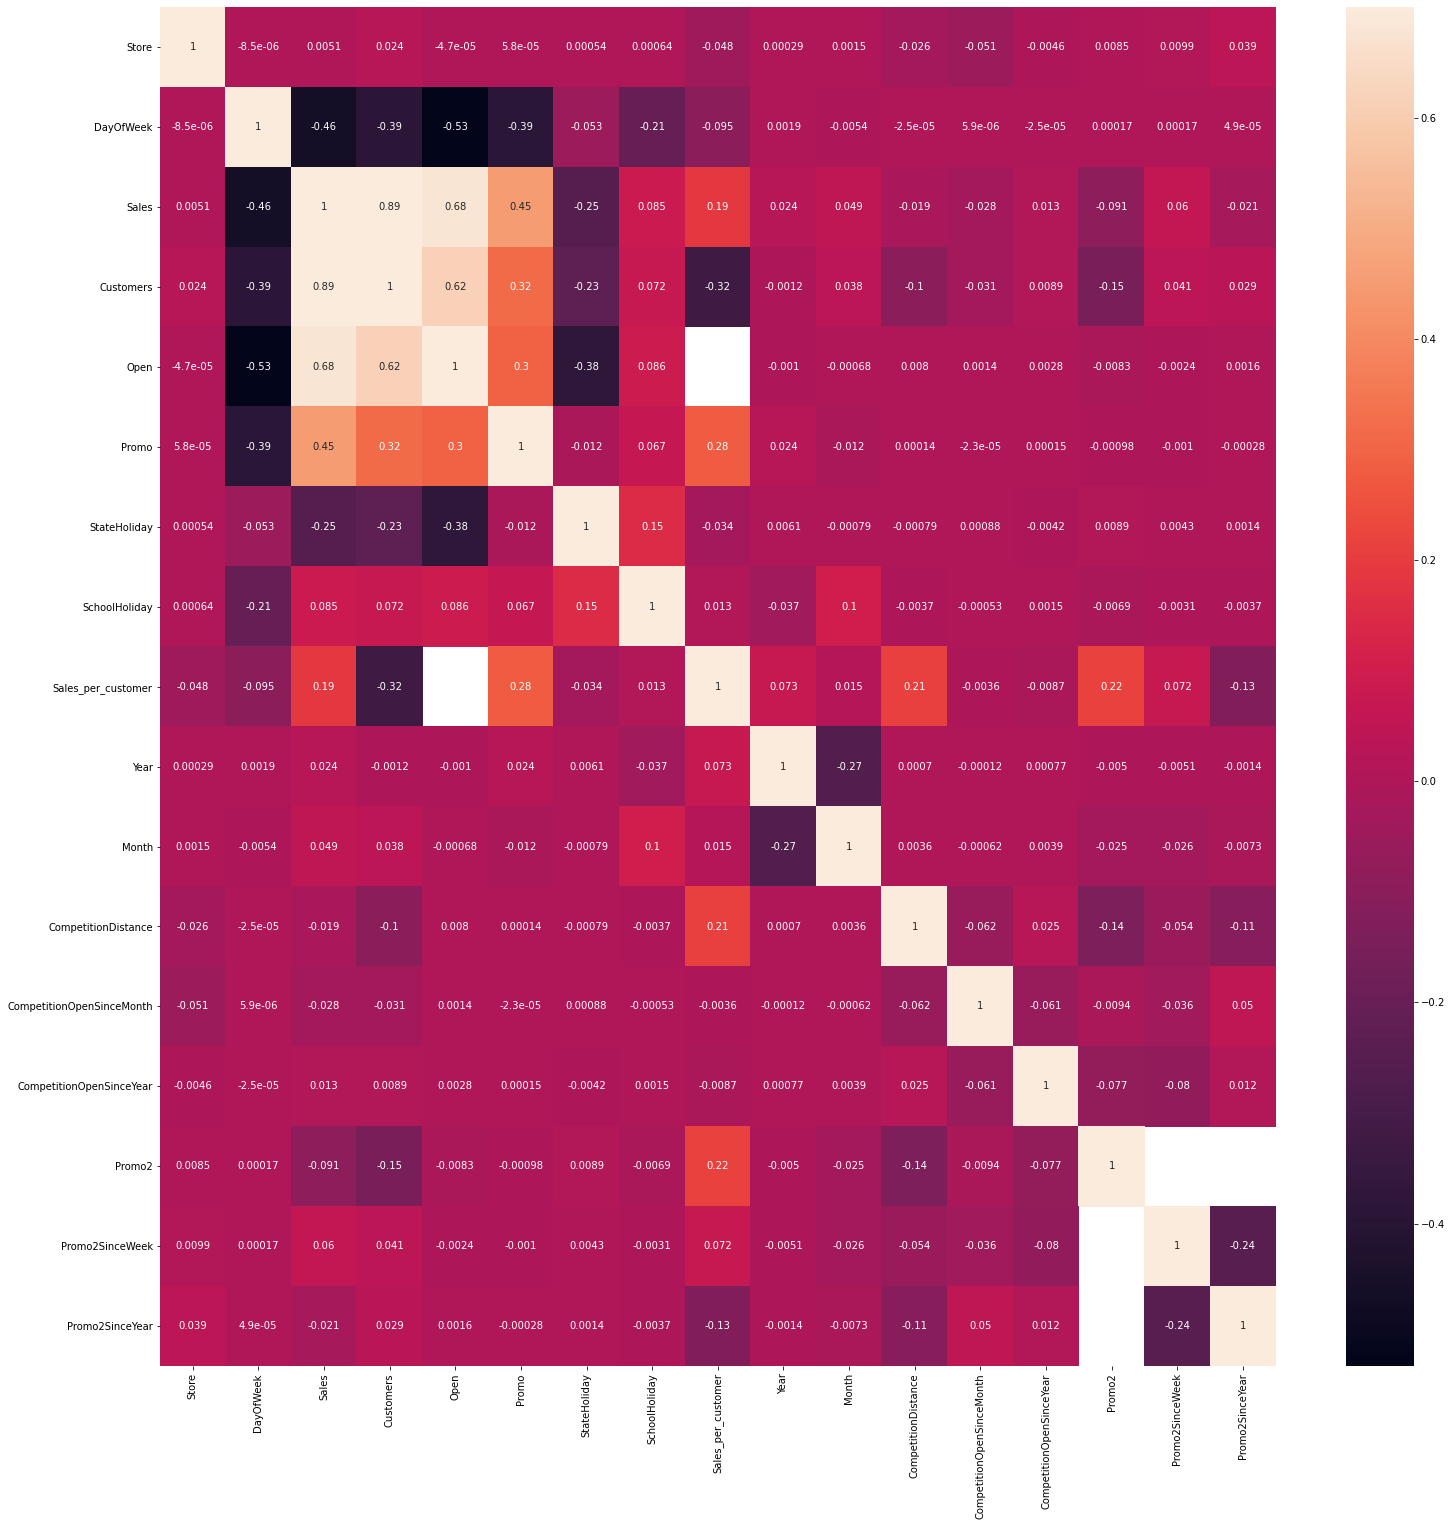

In [ ]:
# Checking correlation bw different variables
plt.figure(figsize=(25,25))
sns.heatmap(train_store.corr(),vmax=.7,cbar=True,annot=True)

The highly correlated features with the target variable(Sales) are :- Promo, Open, Customers, DayOfWeek

**Treating Missing Values**

In [ ]:
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Sales_per_customer           172869
Year                              0
Month                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Text(0.5, 1.0, 'Sales Per Customer')

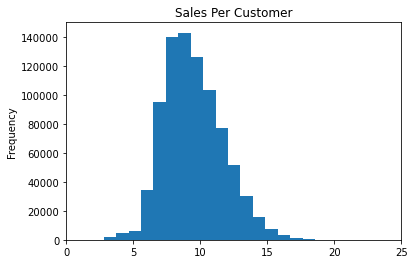

In [ ]:
train_store["Sales_per_customer"].plot(kind='hist',bins=70,xlim=(0,25))
plt.title("Sales Per Customer")

<AxesSubplot:title={'center':'Promo2SinceYear'}, xlabel='Promo2SinceYear'>

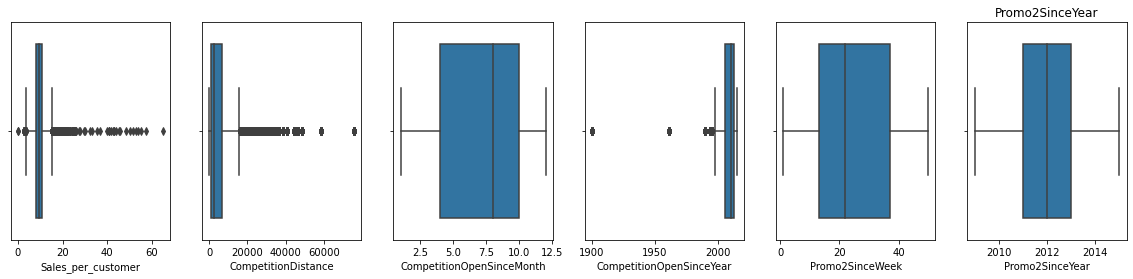

In [ ]:
# Plot average sales on StateHoliday
fig, (axis1,axis2,axis3,axis4,axis5,axis6) = plt.subplots(1,6,figsize=(20,4))
plt.title('Sales per customer')
sns.boxplot( train_store['Sales_per_customer'], ax=axis1)
plt.title('CompetitionDistance')
sns.boxplot( train_store['CompetitionDistance'],ax=axis2)
plt.title('CompetitionOpenSinceMonth')
sns.boxplot( train_store['CompetitionOpenSinceMonth'], ax=axis3)
plt.title('CompetitionOpenSinceYear')
sns.boxplot( train_store['CompetitionOpenSinceYear'], ax=axis4)
plt.title('Promo2SinceWeek')
sns.boxplot( train_store['Promo2SinceWeek'], ax=axis5)
plt.title('Promo2SinceYear')
sns.boxplot( train_store['Promo2SinceYear'], ax=axis6)

You can see there are lot of outliers

In [ ]:
# Replacing missing values with median of their respective columns and dropping PromoInterval as it is not that much related to the dependent variable 

med_sales_per_customer = train_store['Sales_per_customer'].astype('float').median(axis=0)
train_store['Sales_per_customer'].replace(np.nan,med_sales_per_customer,inplace=True)

med_comp_dist = train_store['CompetitionDistance'].astype('float').median(axis=0)
train_store['CompetitionDistance'].replace(np.nan,math.floor(med_comp_dist),inplace=True)

med_comp_month = train_store['CompetitionOpenSinceMonth'].astype('float').median(axis=0)
train_store['CompetitionOpenSinceMonth'].replace(np.nan,math.floor(med_comp_month),inplace=True)

med_comp_year = train_store['CompetitionOpenSinceYear'].astype('float').median(axis=0)
train_store['CompetitionOpenSinceYear'].replace(np.nan,math.floor(med_comp_year),inplace=True)

med_promo2_week = train_store['Promo2SinceWeek'].astype('float').median(axis=0)
train_store['Promo2SinceWeek'].replace(np.nan,math.floor(med_promo2_week),inplace=True)

med_promo2_year = train_store['Promo2SinceYear'].astype('float').median(axis=0)
train_store['Promo2SinceYear'].replace(np.nan,math.floor(med_promo2_year),inplace=True)

train_store.drop(['PromoInterval'],axis=1,inplace=True) # dropping Promo Interval as it is not that relavant

I am replacing with Median (instead of mean due to outliers) as they are not highly correlated to the dependent variable

In [ ]:
train_store.isnull().sum() # no null values

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Sales_per_customer           0
Year                         0
Month                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64

#### Train and Store data Analysis

<AxesSubplot:title={'center':'StoreType vs Customers'}, xlabel='StoreType', ylabel='Customers'>

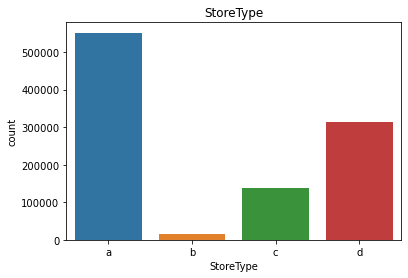

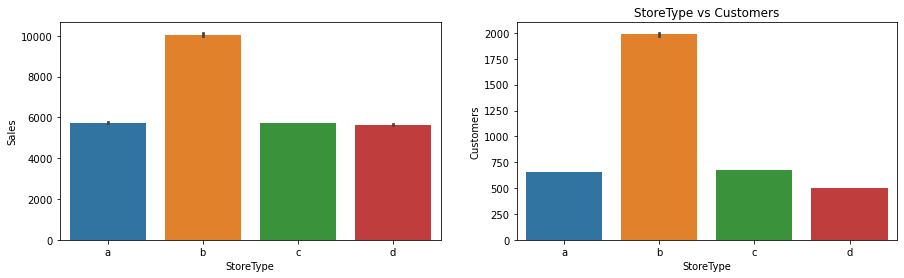

In [ ]:
plt.title('StoreType')
sns.countplot(x='StoreType', data=train_store, order=['a','b','c', 'd'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.title('StoreType vs Sales')
sns.barplot(x='StoreType', y='Sales', data=train_store, order=['a','b','c', 'd'],ax=axis1)
plt.title('StoreType vs Customers')
sns.barplot(x='StoreType', y='Customers', data=train_store, order=['a','b','c', 'd'], ax=axis2)

You can see that the 'b-type' stores are less but have high sales and volume, while 'a-type' stores are high in number but have relatively low sales and volume 

<AxesSubplot:title={'center':'Assortment vs Customers'}, xlabel='Assortment', ylabel='Customers'>

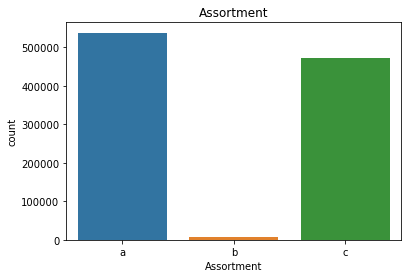

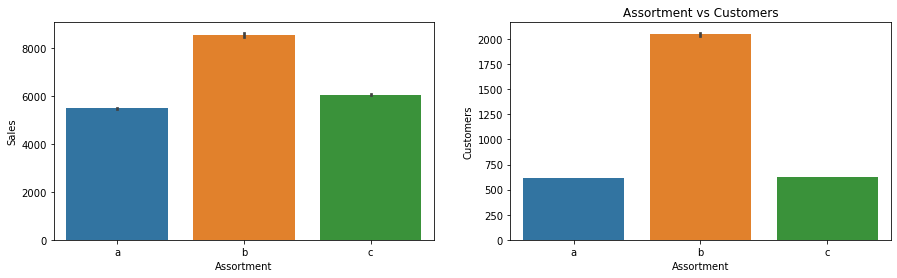

In [ ]:
plt.title('Assortment')
sns.countplot(x='Assortment', data=train_store, order=['a','b','c'])
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.title('Assortment vs Sales')
sns.barplot(x='Assortment', y='Sales', data=train_store, order=['a','b','c'], ax=axis1)
plt.title('Assortment vs Customers')
sns.barplot(x='Assortment', y='Customers', data=train_store, order=['a','b','c'], ax=axis2)

<AxesSubplot:title={'center':'Promo2 vs Customers'}, xlabel='Promo2', ylabel='Customers'>

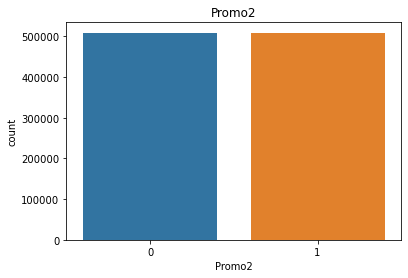

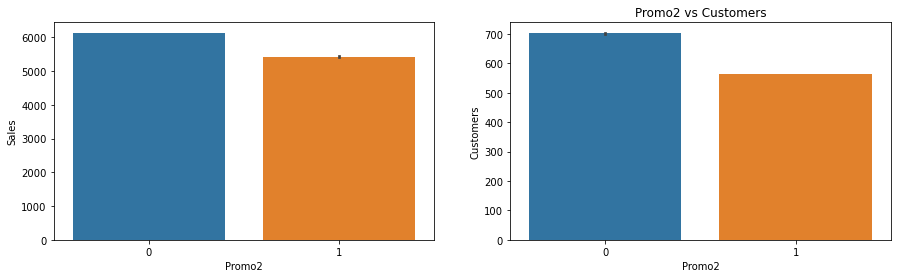

In [ ]:
plt.title('Promo2')
sns.countplot(x='Promo2', data=train_store)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.title('Promo2 vs Sales')
sns.barplot(x='Promo2', y='Sales', data=train_store, ax=axis1)
plt.title('Promo2 vs Customers')
sns.barplot(x='Promo2', y='Customers', data=train_store, ax=axis2)

1.598650289950892

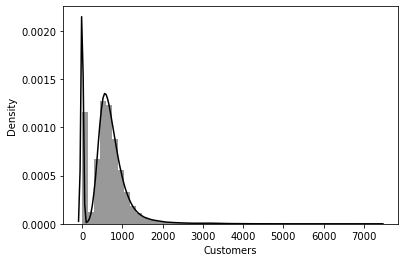

In [ ]:
sns.distplot(train_store['Customers'],color='Black')
train_store['Customers'].skew()

0.6414596158103798

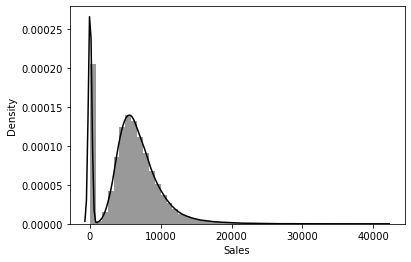

In [ ]:
sns.distplot(train_store['Sales'],color='Black')
train_store['Sales'].skew()

#### Feature Engineering of Train and Test Data

In [ ]:
test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,1,4,2015-09,1.0,1,0,0,2015,9
1,2,3,4,2015-09,1.0,1,0,0,2015,9


In [ ]:
train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_per_customer,Year,Month
0,1,5,2015-07,5263,555,1,1,0,1,9.482883,2015,7
1,2,5,2015-07,6064,625,1,1,0,1,9.702400,2015,7


<AxesSubplot:>

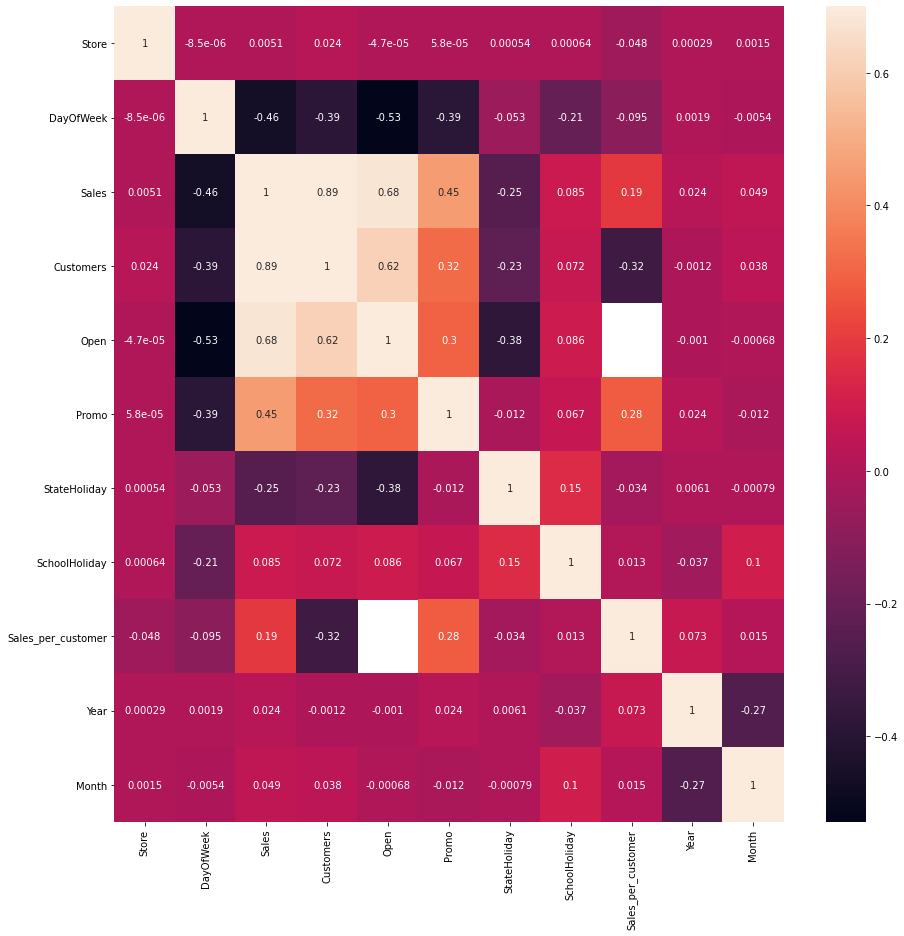

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),vmax=.7,cbar=True,annot=True)

In [ ]:
# Create dummy varibales for DayOfWeek
train_dummies  = pd.get_dummies(train['DayOfWeek'], prefix='Day')
train_dummies.drop(['Day_7'], axis=1, inplace=True)

test_dummies = pd.get_dummies(test['DayOfWeek'],prefix='Day')
test_dummies.drop(['Day_7'], axis=1, inplace=True)

train = train.join(train_dummies)
test = test.join(test_dummies)

In [ ]:
#Droppin unnecessary columns from train and test set
train.drop(['Customers','Sales_per_customer','Year','Month','Date'],axis=1,inplace=True)
train['Open'] = train['Open'].astype(float)
test.drop(['Year','Month','Date'],axis=1,inplace=True)

In [ ]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1017209 non-null  int64  
 1   DayOfWeek      1017209 non-null  int64  
 2   Sales          1017209 non-null  int64  
 3   Open           1017209 non-null  float64
 4   Promo          1017209 non-null  int64  
 5   StateHoliday   1017209 non-null  int64  
 6   SchoolHoliday  1017209 non-null  int64  
 7   Day_1          1017209 non-null  uint8  
 8   Day_2          1017209 non-null  uint8  
 9   Day_3          1017209 non-null  uint8  
 10  Day_4          1017209 non-null  uint8  
 11  Day_5          1017209 non-null  uint8  
 12  Day_6          1017209 non-null  uint8  
dtypes: float64(1), int64(6), uint8(6)
memory usage: 60.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 13 columns):
 #   Column         No

In [ ]:
test[test.isnull().any(axis=1)]

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
479,480,622,4,NaN,1,0,0,0,0,0,1,0,0
1335,1336,622,3,NaN,1,0,0,0,0,1,0,0,0
2191,2192,622,2,NaN,1,0,0,0,1,0,0,0,0
3047,3048,622,1,NaN,1,0,0,1,0,0,0,0,0
4759,4760,622,6,NaN,0,0,0,0,0,0,0,0,1
5615,5616,622,5,NaN,0,0,0,0,0,0,0,1,0
6471,6472,622,4,NaN,0,0,0,0,0,0,1,0,0
7327,7328,622,3,NaN,0,0,0,0,0,1,0,0,0
8183,8184,622,2,NaN,0,0,0,0,1,0,0,0,0
9039,9040,622,1,NaN,0,0,0,1,0,0,0,0,0


As you can see all the null values of open are when week is not 7 and StateHoliday and SchoolHoliday are 0's. So replacing them with 1's

In [ ]:
# fill NaN values in test with Open=1
test["Open"].fillna(1, inplace = True) 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Open           41088 non-null  float64
 4   Promo          41088 non-null  int64  
 5   StateHoliday   41088 non-null  int64  
 6   SchoolHoliday  41088 non-null  int64  
 7   Day_1          41088 non-null  uint8  
 8   Day_2          41088 non-null  uint8  
 9   Day_3          41088 non-null  uint8  
 10  Day_4          41088 non-null  uint8  
 11  Day_5          41088 non-null  uint8  
 12  Day_6          41088 non-null  uint8  
dtypes: float64(1), int64(6), uint8(6)
memory usage: 2.4 MB


In [ ]:
# Dropping DayOfWeek
train.drop(['DayOfWeek'], axis=1,inplace=True)
test.drop(['DayOfWeek'], axis=1,inplace=True)

removing all rows(stores) that were closed as the sales are 0 when store is closed and it tend to make the model unstable

In [ ]:
# remove all rows(store,date) that were closed
train= train[train["Open"] != 0]

Saving id's of those stores which were closed so we can put 0 in their respective sales column

In [ ]:
# Saving id's of those stores which were closed so we can put 0 in their respective sales column
closed_ids = test["Id"][test["Open"] == 0].values
print(closed_ids.shape)
closed_ids

(5984,)


array([  544,   677,   841, ..., 40230, 40231, 40232], dtype=int64)

In [ ]:
# remove all rows(store,date) that were closed
test = test[test["Open"] != 0]

In [ ]:
test = test.reset_index()

In [ ]:
test.drop(["index"],axis =1, inplace= True)

In [ ]:
test.tail()

,Id,Store,Open,Promo,StateHoliday,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
35099,41084,1111,1.0,0,0,0,0,0,0,0,0,1
35100,41085,1112,1.0,0,0,0,0,0,0,0,0,1
35101,41086,1113,1.0,0,0,0,0,0,0,0,0,1
35102,41087,1114,1.0,0,0,0,0,0,0,0,0,1
35103,41088,1115,1.0,0,0,1,0,0,0,0,0,1


In [ ]:
# define training and testing sets
X_train = train.drop(["Sales","Store"],axis=1)
Y_train = train["Sales"].astype(float)

In [ ]:
X_test = test.drop(["Id","Store"],axis=1)

In [ ]:
print(X_test.shape)

(35104, 10)


In [ ]:
print(X_train.shape)

(844392, 10)


Now to the model building part.

#### Neural Network

In [ ]:
from keras import backend as K
def root_mean_squared_error(test, pred):
        return K.sqrt(K.mean(K.square(pred - test)))

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(50, kernel_initializer='he_uniform', activation='relu',input_dim=10))

# Adding the second hidden layer
classifier.add(Dense(25, kernel_initializer='he_uniform', activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(50, kernel_initializer='he_uniform', activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, Y_train.values,validation_split=0.20, batch_size = 10, epochs = 10)

Epoch 1/10
67552/67552 [==============================] - 207s 3ms/step - loss: 2704.0291 - val_loss: 2569.2266
Epoch 2/10
67552/67552 [==============================] - 223s 3ms/step - loss: 2644.0076 - val_loss: 2563.7202
Epoch 3/10
67552/67552 [==============================] - 235s 3ms/step - loss: 2641.2871 - val_loss: 2559.8450
Epoch 4/10
67552/67552 [==============================] - 197s 3ms/step - loss: 2640.8237 - val_loss: 2572.2197
Epoch 5/10
67552/67552 [==============================] - 213s 3ms/step - loss: 2639.0913 - val_loss: 2551.8679
Epoch 6/10
67552/67552 [==============================] - 199s 3ms/step - loss: 2640.2610 - val_loss: 2566.1699
Epoch 7/10
67552/67552 [==============================] - 205s 3ms/step - loss: 2639.7764 - val_loss: 2563.1052
Epoch 8/10
67552/67552 [==============================] - 218s 3ms/step - loss: 2637.8467 - val_loss: 2557.2100
Epoch 9/10
67552/67552 [==============================] - 232s 3ms/step - loss: 2639.2839 - val_loss: 25

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
pred=pd.DataFrame(y_pred,columns = ['Sales'])

In [ ]:
submission = pd.concat([test['Id'],pred],axis=1)

In [ ]:
#Creating closed stores dataframe
Closed_Stores = pd.DataFrame(closed_ids,columns = ['Id'])
print(Closed_Stores.shape)
Closed_Stores.head()

(5984, 1)


,Id
0,544
1,677
2,841
3,1400
4,1533


In [ ]:
Closed_Stores['Sales'] = 0

In [ ]:
submission = submission.append(Closed_Stores)

In [ ]:
submission.to_csv('submission.csv', index=False)